In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import style
import datetime
import mpl_toolkits
%matplotlib inline

In [166]:
data = pd.read_csv("badri_rollups.csv")
#data = data.reindex(index=data.index[::-1])
df = data.loc[:, ('energy_produced','peak_power','date')]

In [167]:
df.head()

energy_produced  peak_power        date
0            12396        4435  2020/03/29
1             8090        4185  2020/03/28
2            23128        5813  2020/03/27
3            32304        5496  2020/03/26
4            19057        4652  2020/03/25

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   energy_produced  58 non-null     int64 
 1   peak_power       58 non-null     int64 
 2   date             58 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [169]:
df.describe()

energy_produced   peak_power
count        58.000000    58.000000
mean      20303.931034  4383.241379
std        5136.556966   623.367350
min        5643.000000  2000.000000
25%       18990.250000  4100.500000
50%       20575.000000  4293.500000
75%       23132.500000  4630.500000
max       32304.000000  5813.000000

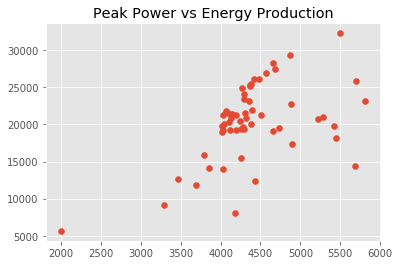

69 1


In [176]:
plt.scatter(df.peak_power, df.energy_produced)
plt.title("Peak Power vs Energy Production")
plt.show()

forecast_col = "energy_produced"
df.fillna(-99999, inplace=True)
forecast_out=int(math.ceil(0.01 * len(df)))
print(len(df), forecast_out)
#print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)

In [171]:
df.dropna(inplace=True)
df.head()

energy_produced  peak_power        date    label
0            12396        4435  2020/03/29   8090.0
1             8090        4185  2020/03/28  23128.0
2            23128        5813  2020/03/27  32304.0
3            32304        5496  2020/03/26  19057.0
4            19057        4652  2020/03/25  19789.0

In [172]:
X = np.array(df.drop(['label','date'], 1))
y = np.array(df['label'])
X = preprocessing.scale(X)
#X = X[:-forecast_out]
#X_lately = X[-forecast_out:]

y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train,y_train)
accuracy = abs(reg.score(X_test,y_test))
print(accuracy)
forecast_set = reg.predict(X_test)
print(forecast_set)
print(forecast_out)

0.09644091515563735
[17004.92605654 22162.68347286 15070.41961923 20702.47468311
 20701.64887485 21920.97646834 21572.51085768 21494.37336095
 22030.77554217 21554.71439473 21949.64880443 20594.73846501]
1


In [174]:
last_day = datetime.datetime.strptime(df.iloc[-1].date, "%Y/%m/%d")
last_unix = last_day.timestamp()
print(last_unix)
#next_day = last_day + datetime.timedelta(days=1)
one_day = 86400
next_unix = last_unix + one_day
print(next_unix)

1580581800.0
1580668200.0


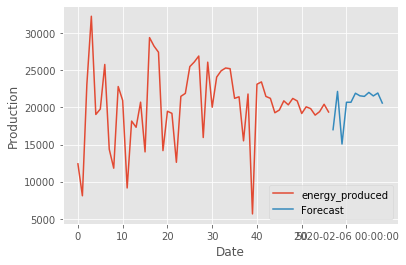

In [175]:
df['Forecast'] = np.nan

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

#print(df.tail())   
style.use('ggplot')

df['energy_produced'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()